In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


# ------------------------------
# Función de simulación Euler-Maruyama
# ------------------------------
def simulate_path_Allee(r, sigma, N0, dt, n, K, A):
    N = np.zeros(n)
    N[0] = N0
    for i in range(1, n):
        dW = np.sqrt(dt) * np.random.randn()
        N[i] = N[i-1] + r*N[i-1]*(1 - N[i-1]/K)*(N[i-1]/A - 1)*dt + sigma*N[i-1]*dW
        if N[i] < 0:
            N[i] = 0
    return N

# ------------------------------
# Método Runge-Kutta 4 bien implementado
# ------------------------------
def runge_kutta4(f, N0, dt, n):
    N = np.zeros(n)
    N[0] = N0
    for i in range(1, n):
        k1 = f(N[i-1])
        k2 = f(N[i-1] + 0.5 * dt * k1)
        k3 = f(N[i-1] + 0.5 * dt * k2)
        k4 = f(N[i-1] + dt * k3)
        N[i] = N[i-1] + dt * (k1 + 2*k2 + 2*k3 + k4) / 6
    return N

# ------------------------------
# Solución determinista
# ------------------------------
def Allee_determinista(r, N0, dt, n, K, A):
    def f(N):
        return r * N * (1 - N/K) * (N/A - 1)
    return runge_kutta4(f, N0, dt, n)



In [76]:
def experiment8(
        r=0.2, T=50, dt=0.001, sigma=0.2,
        K=1000, A=None,
        N0_list=None,
        n_paths=20
    ):

    if A is None:
        A = int(K / 4.0)   # Umbral de Allee más visible

    if N0_list is None:
        # Tres regímenes: debajo de A, justo encima de A, claramente por encima de K
        N0_list = [0.9 * A, 1.1 * A, 1.5 * K]

    n = int(T / dt) + 1
    t = np.linspace(0, T, n)

    # Tipografía clara y grande
    plt.rcParams.update({'font.size': 14})

    fig, axes = plt.subplots(1, len(N0_list), figsize=(12, 5), sharey=True)

    y_max = 1500
    y_min = 0

    # Para recoger handles de la leyenda global
    handles = []
    labels = []

    for idx, N0 in enumerate(N0_list):
        ax = axes[idx]

        # Trayectorias estocásticas
        for _ in range(n_paths):
            N = simulate_path_Allee(r, sigma, N0, dt, n, K, A)
            ax.plot(t, N, color='tab:blue', alpha=0.30, linewidth=1)

        # Determinista
        N_det = Allee_determinista(r, N0, dt, n, K, A)
        h_det, = ax.plot(t, N_det, color='black', linewidth=2.5, label="Determinista")

        # Líneas K y A
        h_K = ax.axhline(K, color='green', linestyle='--', linewidth=2, label=fr"$K={K}$")
        h_A = ax.axhline(A, color='red', linestyle='--', linewidth=2, label=fr"$A={A}$")

        # Guardar handles solo una vez
        if idx == 0:
            handles = [h_det, h_K, h_A]
            labels = ["Determinista", fr"$K={K}$", fr"$A={A}$"]

        ax.set_title(fr"$N_0/K = {N0/K:.2f}$", fontsize=15)
        ax.set_xlabel("Tiempo", fontsize=15)
        if idx == 0:
            ax.set_ylabel("Población", fontsize=15)

        ax.set_xlim(0, T)
        ax.set_ylim(y_min, y_max)
        ax.grid(alpha=0.3)

    # Leyenda global, arriba y bordeada
    fig.legend(
        handles, labels,
        loc="upper center",
        ncol=3,
        frameon=True,
        fancybox=True,
        framealpha=0.95,
        edgecolor="black",
        fontsize=14,
        bbox_to_anchor=(0.5, 1.05)
    )

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig("experimento8_Allee.png", dpi=900, bbox_inches="tight")
    plt.show()

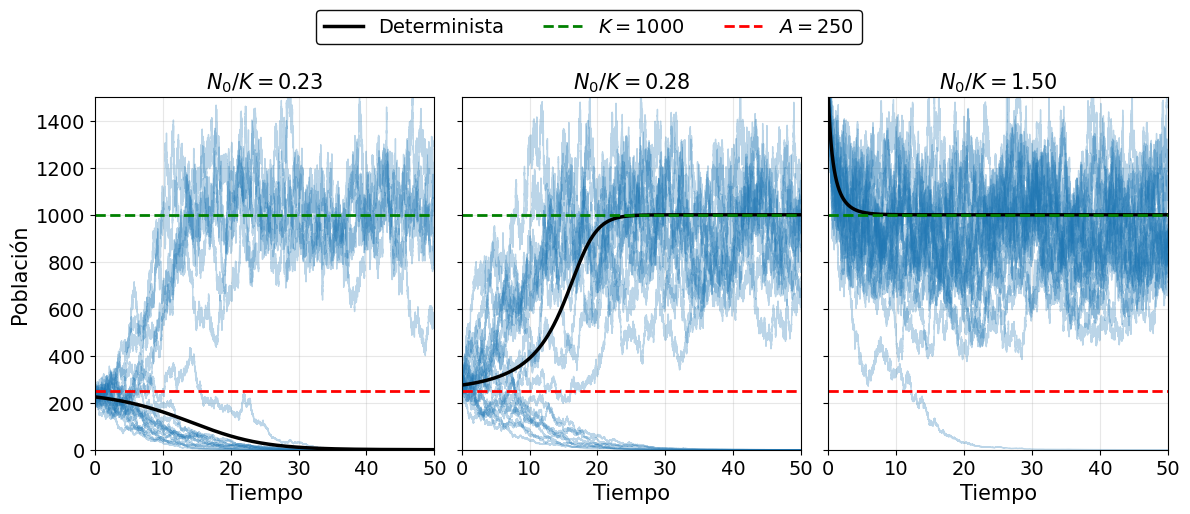

In [77]:
experiment8()

In [78]:
def experimento9(r=0.2, T=50, dt=0.001, sigmas=[0.01, 0.1, 0.5],
                         num_paths=20, K=1000, A=250):

    n = int(T / dt) + 1
    t = np.linspace(0, T, n)
    N0 = 0.9 * A  # población inicial por debajo del umbral

    # Configuración tipográfica
    plt.rcParams.update({'font.size': 14})
    fig, axes = plt.subplots(1, len(sigmas), figsize=(12, 5), sharey=True)

    y_min = 0
    y_max = 1500  # máximo fijo

    handles = []
    labels = []

    for i, sigma in enumerate(sigmas):
        ax = axes[i] if len(sigmas) > 1 else axes

        # Dibujar trayectorias usando el ciclo automático de colores
        for j in range(num_paths):
            N = simulate_path_Allee(r, sigma, N0, dt, n, K, A)
            ax.plot(t, N, alpha=0.7, linewidth=1)

        # Líneas horizontales K y A
        h_K = ax.axhline(K, color='green', linestyle='--', linewidth=2, label=fr"$K={K}$")
        h_A = ax.axhline(A, color='red', linestyle='--', linewidth=2, label=fr"$A={A}$")

        # Guardar handles y labels solo en la primera iteración
        if i == 0:
            handles = [h_K, h_A]
            labels = [fr"$K={K}$", fr"$A={A}$"]

        ax.set_title(fr"$\sigma = {sigma}$", fontsize=15)
        ax.set_xlabel("Tiempo", fontsize=15)
        if i == 0:
            ax.set_ylabel("Población", fontsize=15)

        ax.set_xlim(0, T)
        ax.set_ylim(y_min, y_max)
        ax.grid(alpha=0.3)

    # Leyenda global arriba y bordeada
    fig.legend(
        handles, labels,
        loc="upper center",
        ncol=2,
        frameon=True,
        fancybox=True,
        framealpha=0.95,
        edgecolor="black",
        fontsize=14,
        bbox_to_anchor=(0.5, 1.05)
    )

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('experimento9_Allee.png', dpi=900, bbox_inches='tight')
    plt.show()

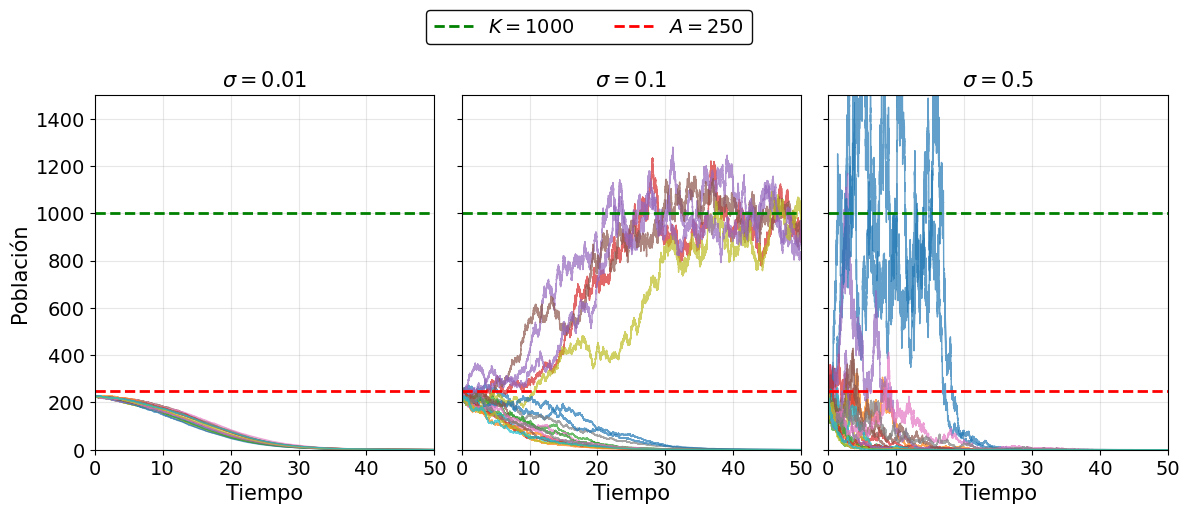

In [84]:
experimento9()

In [30]:
def experiment10(r=0.2, N0=90, T=100, dt=0.001, sigma=0.2, num_runs=2000, K=1000, A=100):
    n = int(T/dt)
    t = np.linspace(0, T, n)
    
    data = np.zeros((num_runs, n))
    for k in range(num_runs):
        data[k] = simulate_path_Allee(r, sigma, N0, dt, n, K, A)
    
    mean_N = np.mean(data, axis=0)
    median_N = np.median(data, axis=0)
    deterministic = Alle_determinista(r, N0, dt, n, K, A)
    
    plt.figure(figsize=(12, 7))
    plt.plot(t, mean_N, label="Media", linewidth=2)
    plt.plot(t, median_N, label="Mediana", linewidth=2)
    plt.plot(t, deterministic, 'k--', label="Solución determinista")
    plt.xlabel("Tiempo")
    plt.ylabel("Población")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.savefig('media_Allee.png', dpi=900, bbox_inches='tight')
    plt.show()

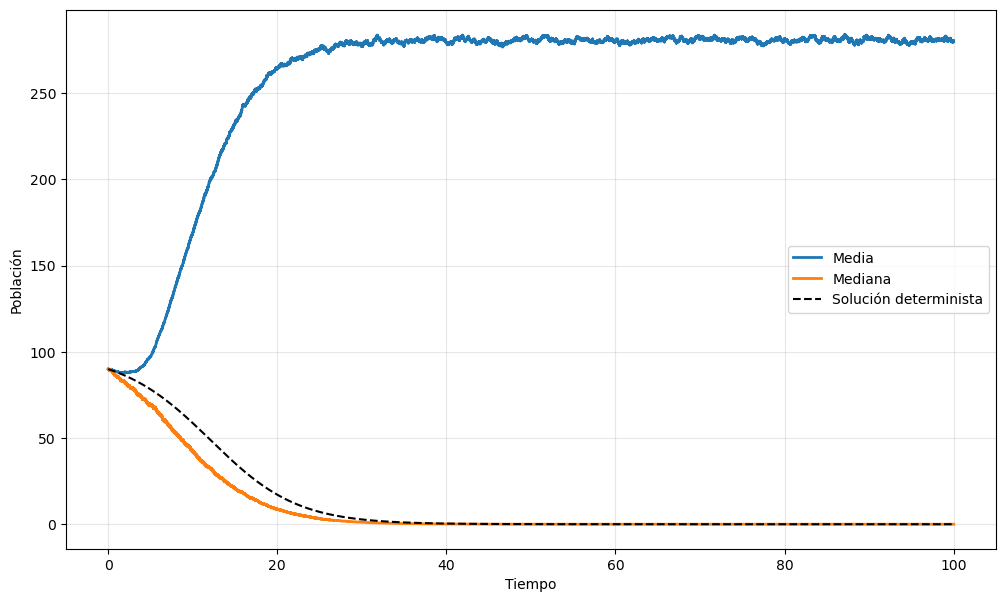

In [31]:
experiment10()

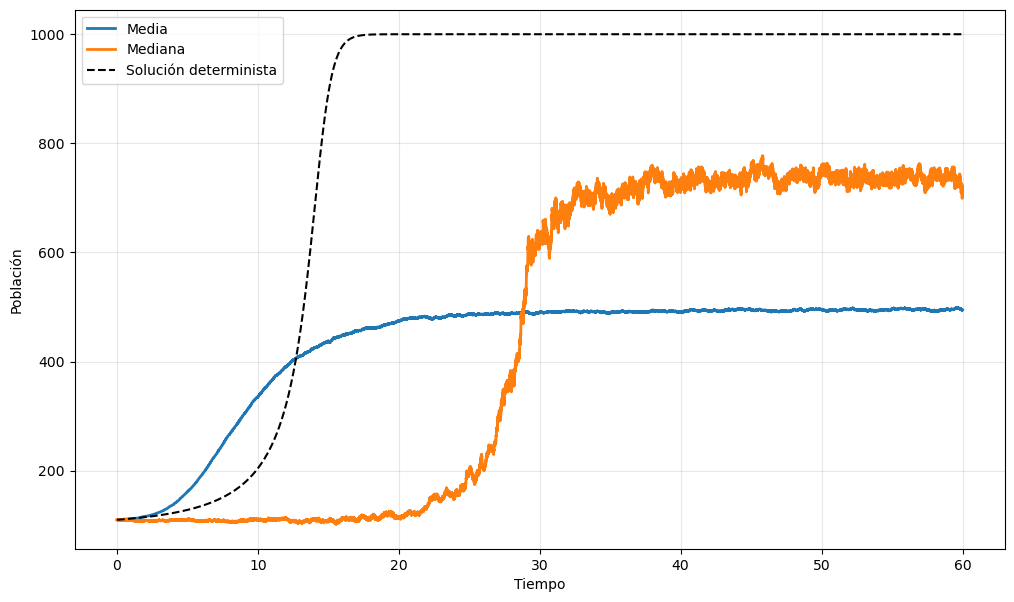

In [39]:
experiment10(N0=110, T=60)

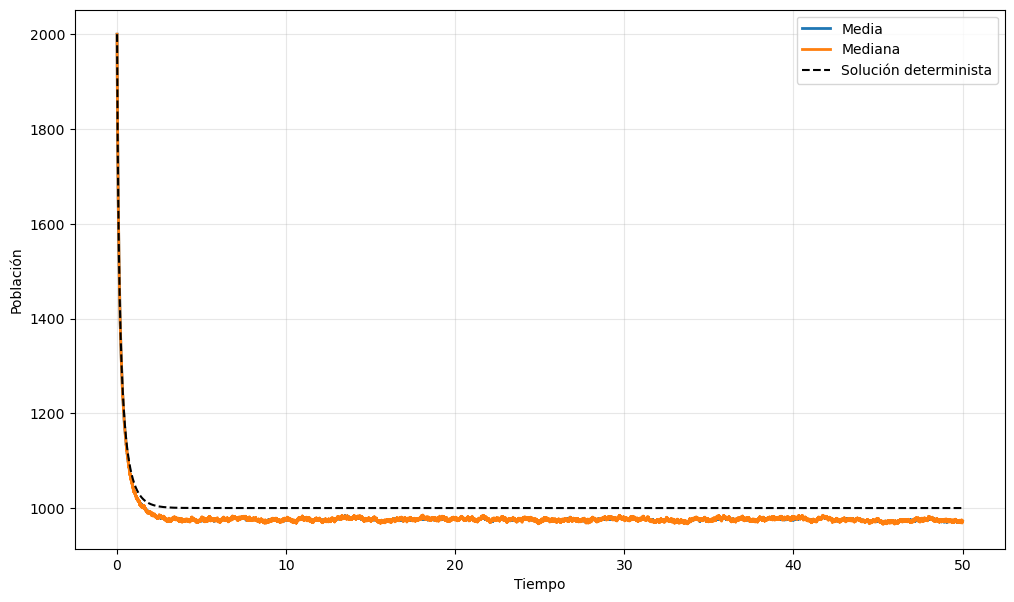

In [40]:
experiment10(N0= 2000, T=50)

In [35]:
def experiment11(r=0.2, N0=100, T=50, dt=0.001, sigmas=[0.01, 0.1], num_runs=5000, K=1000, A=100):
    n = int(T/dt)
    t = np.linspace(0, T, n)
    
    plt.figure(figsize=(12, 5))
    for idx, sigma in enumerate(sigmas):
        final_values = []
        for k in range(num_runs):
            N = simulate_path_Allee(r, sigma, N0, dt, n, K, A)
            final_values.append(N[-1])
        plt.subplot(1, len(sigmas), idx+1)
        plt.hist(final_values, bins=80, density=True, alpha=0.7)
        plt.title(f"Distribución de N(T) para σ = {sigma}")
        plt.xlabel("Valor final N(T)")
        plt.ylabel("Densidad")
        plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('histogramas_Allee.png', dpi=900, bbox_inches='tight')
    plt.show()

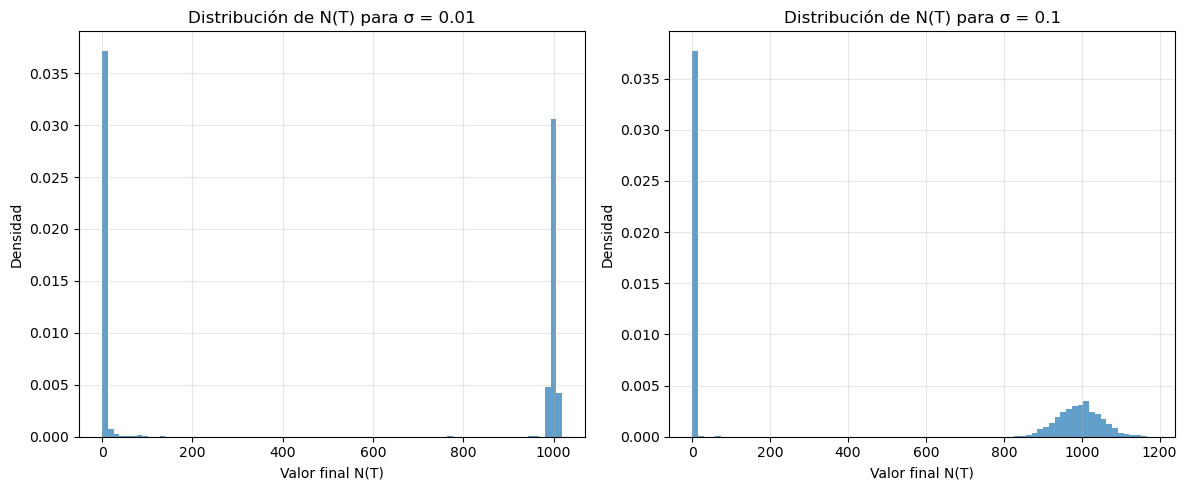

In [36]:
experiment11()

In [37]:
# Vamos a calcular muchas trayectorias para distintos valores de sigma y calcular la media y la mediana del valor final N(T).

def experimento12(r=0.2, N0=90, T=100, dt=0.001, sigmas=[0, 0.001, 0.01, 0.1, 0.2, 0.5, 0.7], num_runs=2000, K=1000, A=100):
    n = int(T/dt)
    t = np.linspace(0, T, n)

    plt.figure(figsize=(15, 10))
    for i, sigma in enumerate(sigmas):
        data = np.zeros((num_runs, n))
        for k in range(num_runs):
            data[k] = simulate_path_Allee(r, sigma, N0, dt, n, K, A)
        
        mean_N = np.mean(data, axis=0)
        median_N = np.median(data, axis=0)

        plt.plot(sigma, mean_N[-1], 'o', label='Media' if i == 0 else "", color='blue')
        plt.plot(sigma, median_N[-1], 'o', label='Mediana' if i == 0 else "", color='red')
    plt.xscale('log')
    plt.xlabel("Sigma")
    plt.ylabel("Valor final N(T)")

    plt.legend()
    plt.grid(alpha=0.3)
    plt.savefig('media_mediana_final_Allee.png', dpi=900, bbox_inches='tight')
    plt.show()

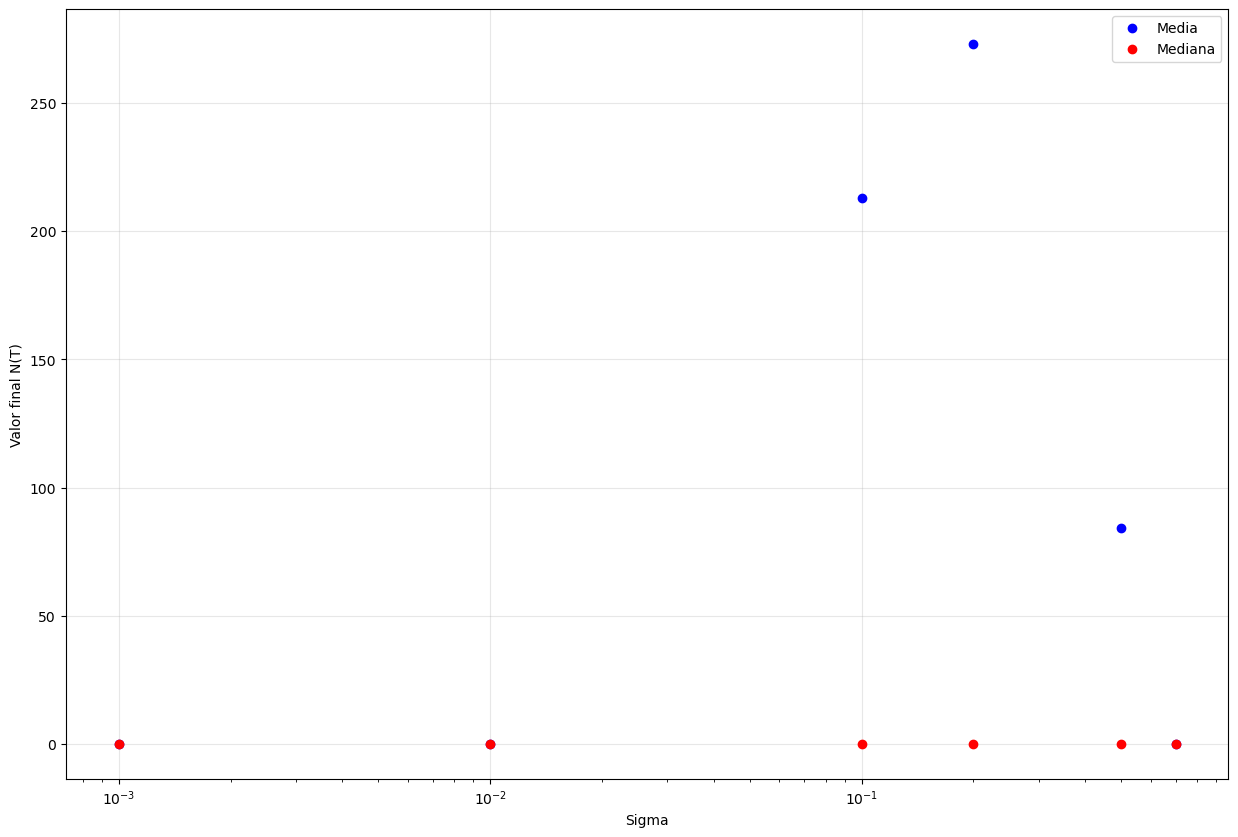

In [38]:
experimento12()

In [3]:
def extinction_heatmap(
        r=0.2, T=50, dt=0.001,
        A=250, K=1000,
        sigma_min=0.01, sigma_max=0.6, n_sigma=20,
        N0_min=None, N0_max=None, n_N0=20,
        n_paths=100,
        N_threshold=5
    ):

    if N0_min is None:
        N0_min = 0.4 * A
    if N0_max is None:
        N0_max = 2.5 * A

    sigma_values = np.linspace(sigma_min, sigma_max, n_sigma)
    N0_values = np.linspace(N0_min, N0_max, n_N0)

    n = int(T / dt) + 1
    heatmap = np.zeros((len(N0_values), len(sigma_values)))

    # ------------------------------
    # Cálculo con impresión
    # ------------------------------
    for j, N0 in enumerate(N0_values):
        for i, sigma in enumerate(sigma_values):
            extinctions = 0
            for _ in range(n_paths):
                N = simulate_path_Allee(r, sigma, N0, dt, n, K, A)
                if N[-1] < N_threshold:
                    extinctions += 1
            heatmap[j, i] = extinctions / n_paths

            print(
                f"N0={N0:7.1f}, sigma={sigma:5.3f} "
                f"→ P(extinción antes de T={T}) = {heatmap[j,i]:.3f}"
            )

    # ------------------------------
    # Colormap
    # ------------------------------
    colors = [(0,1,0), (1,1,0), (1,0,0)]
    cmap = LinearSegmentedColormap.from_list(
        "green_yellow_red", colors
    )

    # ------------------------------
    # Figura
    # ------------------------------
    fig, ax = plt.subplots(figsize=(9, 6))

    im = ax.imshow(
        heatmap,
        origin='lower',
        aspect='auto',
        cmap=cmap,
        vmin=0,
        vmax=1,
        extent=[sigma_min, sigma_max, N0_min, N0_max]
    )

    # ------------------------------
    # Contorno P(extinción)=0.95
    # ------------------------------
    Sigma_grid, N0_grid = np.meshgrid(sigma_values, N0_values)

    contour_95 = ax.contour(
        Sigma_grid,
        N0_grid,
        heatmap,
        levels=[0.95],
        colors='black',
        linewidths=2
    )
    contour_95.collections[0].set_label(r'$P_{\mathrm{ext}}=0.95$')

    # Colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(
        fr'Probabilidad de extinción antes de $T={T}$',
        fontsize=14
    )

    # Línea del umbral de Allee
    ax.axhline(A, color='blue', linestyle='--', linewidth=2, label=fr'$A={A}$')

    ax.set_xlabel(r'$\sigma$ (intensidad del ruido)', fontsize=15)
    ax.set_ylabel(r'$N_0$ (población inicial)', fontsize=15)

    ax.set_xlim(sigma_min, sigma_max)
    ax.set_ylim(N0_min, N0_max)

    # Leyenda arriba
    ax.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.15),
        ncol=3,
        frameon=True,
        fancybox=True,
        framealpha=0.95,
        edgecolor="black",
        fontsize=14
    )

    plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.savefig('heatmap_extinction.png', dpi=900, bbox_inches='tight')
    plt.show()

    return heatmap


N0=  100.0, sigma=0.010 → P(extinción antes de T=50) = 1.000
N0=  100.0, sigma=0.041 → P(extinción antes de T=50) = 1.000
N0=  100.0, sigma=0.072 → P(extinción antes de T=50) = 1.000
N0=  100.0, sigma=0.103 → P(extinción antes de T=50) = 1.000
N0=  100.0, sigma=0.134 → P(extinción antes de T=50) = 1.000
N0=  100.0, sigma=0.165 → P(extinción antes de T=50) = 1.000
N0=  100.0, sigma=0.196 → P(extinción antes de T=50) = 1.000
N0=  100.0, sigma=0.227 → P(extinción antes de T=50) = 0.980
N0=  100.0, sigma=0.258 → P(extinción antes de T=50) = 0.990
N0=  100.0, sigma=0.289 → P(extinción antes de T=50) = 0.990
N0=  100.0, sigma=0.321 → P(extinción antes de T=50) = 0.950
N0=  100.0, sigma=0.352 → P(extinción antes de T=50) = 0.990
N0=  100.0, sigma=0.383 → P(extinción antes de T=50) = 0.990
N0=  100.0, sigma=0.414 → P(extinción antes de T=50) = 1.000
N0=  100.0, sigma=0.445 → P(extinción antes de T=50) = 0.990
N0=  100.0, sigma=0.476 → P(extinción antes de T=50) = 0.980
N0=  100.0, sigma=0.507 

C:\Users\alvar\AppData\Local\Temp\ipykernel_74828\3825240670.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  contour_95.collections[0].set_label(r'$P_{\mathrm{ext}}=0.95$')


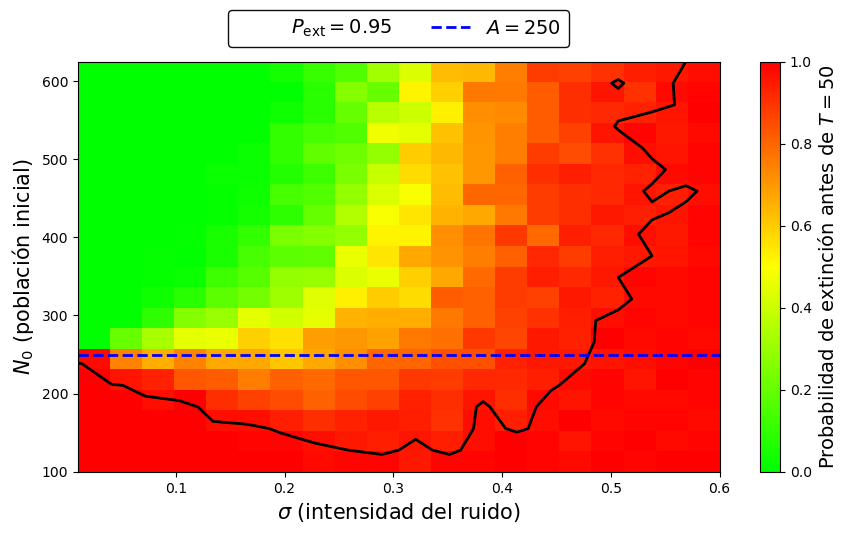

array([[1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.98, 0.99, 0.99, 0.95,
        0.99, 0.99, 1.  , 0.99, 0.98, 1.  , 0.99, 1.  , 1.  ],
       [1.  , 1.  , 1.  , 1.  , 1.  , 0.99, 0.99, 0.97, 0.95, 0.94, 0.96,
        0.94, 0.97, 1.  , 0.99, 0.96, 0.99, 1.  , 0.98, 0.99],
       [1.  , 1.  , 1.  , 1.  , 0.97, 0.97, 0.94, 0.91, 0.93, 0.95, 0.94,
        0.9 , 0.97, 0.94, 0.97, 1.  , 0.98, 0.99, 0.99, 0.98],
       [1.  , 1.  , 0.97, 1.  , 0.91, 0.87, 0.85, 0.81, 0.85, 0.87, 0.93,
        0.91, 0.96, 0.91, 0.98, 0.96, 0.99, 0.98, 0.98, 0.99],
       [1.  , 0.96, 0.93, 0.83, 0.82, 0.75, 0.81, 0.79, 0.83, 0.83, 0.89,
        0.88, 0.92, 0.92, 0.94, 0.98, 0.99, 0.96, 1.  , 0.99],
       [0.98, 0.74, 0.66, 0.74, 0.67, 0.67, 0.61, 0.67, 0.72, 0.8 , 0.8 ,
        0.84, 0.84, 0.93, 0.95, 0.95, 0.96, 0.97, 0.99, 1.  ],
       [0.  , 0.2 , 0.33, 0.45, 0.46, 0.59, 0.56, 0.69, 0.7 , 0.68, 0.76,
        0.78, 0.89, 0.86, 0.95, 0.93, 1.  , 0.98, 0.99, 0.98],
       [0.  , 0.  , 0.09, 0.26, 0.3 , 0.4

In [4]:
extinction_heatmap()